In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import pickle as pckl
%matplotlib inline
sns.set_style("whitegrid")

import os

In [2]:
import sys

sys.path.append('../code/')

import make_genesets

In [7]:
for geneset in ['KEGG','BIOCARTA','REACTOME']:
    make_genesets.make_overlap_gene_sets(geneset,'dorothea_AB')

In [3]:
#run_viper.R helper_merge_benchmark.py benchmark_progeny.py

In [11]:
#check the random distribution of ROC AUCs
results=pd.read_csv('../results/benchmark/rocaucs/progeny/single/random_dist.csv',sep=',',header=0,index_col=0)
progeny=pd.read_csv('../results/benchmark/datasets/progeny_meta.csv',
                        sep=',',header=0,index_col=0)
progeny=progeny['pathway'].value_counts()
progeny=progeny[results.index]
background=pd.DataFrame(index=results.index,columns=['Mean','Sd','Size'])
background['Mean']=np.mean(results,1)
background['Sd']=np.std(results,1)
background['Size']=progeny

In [12]:
#normalise ROCAUCS
fnames=os.listdir('../results/benchmark/rocaucs/progeny/overlap//')
data={}
for fname in fnames:
    data[fname[:-4]]=pd.read_csv('../results/benchmark/rocaucs/progeny/overlap//'+fname,sep=',',header=0,index_col=0)
for method in data.keys():
    for pw in background.index:
        data[method].loc[pw,:]=(data[method].loc[pw,:]-0.5)/background.loc[pw,'Sd']
for method in data.keys():
    data[method].to_csv('../results/benchmark/z_scores/progeny/overlap//%s.csv' % method, sep=',')

In [199]:
results=pd.read_csv('../results/benchmark/rocaucs/tcga/single/random_dist.csv',sep=',',header=0,index_col=0)
tcga=pd.read_csv('../results/benchmark/datasets/tcga_meta.csv',
                        sep=',',header=0,index_col=0)
tcga=tcga['TCGA'].value_counts()
tcga=tcga[results.index]
background=pd.DataFrame(index=results.index,columns=['Mean','Sd','Size'])
background['Mean']=np.mean(results,1)
background['Sd']=np.std(results,1)
background['Size']=tcga

In [201]:
#normalise ROCAUCS
fnames=os.listdir('../results/benchmark/rocaucs/tcga/overlap/')
data={}
for fname in fnames:
    data[fname[:-4]]=pd.read_csv('../results/benchmark/rocaucs/tcga/overlap/'+fname,sep=',',header=0,index_col=0)
for method in data.keys():
    for pw in background.index:
        data[method].loc[pw,:]=(data[method].loc[pw,:]-0.5)/background.loc[pw,'Sd']
for method in data.keys():
    data[method].to_csv('../results/benchmark/z_scores/tcga/overlap/%s.csv' % method, sep=',')

In [335]:
dname1='KEGG'
dname2='dorothea_AB'
bname='tcga'
abs_type=True
size_fil=False
th=10

In [336]:
if abs_type:
    activity1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_abs.csv' % (bname,dname1),
                              sep=',',header=0,index_col=0).abs().max()
    activity2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_abs.csv' % (bname,dname2),
                              sep=',',header=0,index_col=0).abs().max()
else:
    activity1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s.csv' % (bname,dname1),
                              sep=',',header=0,index_col=0).abs().max()
    activity2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s.csv' % (bname,dname2),
                              sep=',',header=0,index_col=0).abs().max()

In [337]:
good1=activity1.index[activity1>th]
good2=activity2.index[activity2>th]

In [338]:
if dname1<dname2:
    overlap_name=dname1+'_overlap_'+dname2
else:
    overlap_name=dname2+'_overlap_'+dname1

In [339]:
if abs_type:
    activity1m2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_minus_%s_abs.csv' % (bname,dname1,dname2),
                           sep=',',header=0,index_col=0).abs().max()
    activity2m1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_minus_%s_abs.csv' % (bname,dname2,dname1),
                           sep=',',header=0,index_col=0).abs().max()
    activity1o2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_abs.csv' % (bname,overlap_name),
                           sep=',',header=0,index_col=0).abs().max()
else:
    activity1m2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_minus_%s.csv' % (bname,dname1,dname2),
                           sep=',',header=0,index_col=0).abs().max()
    activity2m1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_minus_%s.csv' % (bname,dname2,dname1),
                           sep=',',header=0,index_col=0).abs().max()
    activity1o2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s.csv' % (bname,overlap_name),
                           sep=',',header=0,index_col=0).abs().max()


In [340]:
activity1m2=pd.DataFrame(activity1m2,columns=['Score'])
if dname1<dname2:
    activity1m2['First']=pd.Series(activity1m2.index).apply(lambda x:x.split('*')[0]).values
    activity1m2['Second']=pd.Series(activity1m2.index).apply(lambda x:x.split('*')[1]).values
else:
    activity1m2['Second']=pd.Series(activity1m2.index).apply(lambda x:x.split('*')[0]).values
    activity1m2['First']=pd.Series(activity1m2.index).apply(lambda x:x.split('*')[1]).values
fil=np.in1d(activity1m2['First'],good1) & np.in1d(activity1m2['Second'],good2)
activity1m2=activity1m2[fil]

In [341]:
activity2m1

KEGG_ABC_TRANSPORTERS*ETS1               9.469429
KEGG_ABC_TRANSPORTERS*TP53              10.702502
KEGG_ACUTE_MYELOID_LEUKEMIA*CTCF         6.986139
KEGG_ACUTE_MYELOID_LEUKEMIA*EGR1        10.100702
KEGG_ACUTE_MYELOID_LEUKEMIA*GATA3        5.177546
KEGG_ACUTE_MYELOID_LEUKEMIA*HNF4A        8.879264
KEGG_ACUTE_MYELOID_LEUKEMIA*RUNX1        7.383574
KEGG_ACUTE_MYELOID_LEUKEMIA*SP1         14.611859
KEGG_ACUTE_MYELOID_LEUKEMIA*STAT1        9.444628
KEGG_ACUTE_MYELOID_LEUKEMIA*TAL1         8.574465
KEGG_ACUTE_MYELOID_LEUKEMIA*TP53        11.028119
KEGG_ADHERENS_JUNCTION*CTCF              7.109094
KEGG_ADHERENS_JUNCTION*E2F1             13.558390
KEGG_ADHERENS_JUNCTION*ESR1              7.677007
KEGG_ADHERENS_JUNCTION*ETS1              9.252628
KEGG_ADHERENS_JUNCTION*GATA2             8.183682
KEGG_ADHERENS_JUNCTION*GATA3             5.477348
KEGG_ADHERENS_JUNCTION*MITF              6.870416
KEGG_ADHERENS_JUNCTION*MYC               9.347287
KEGG_ADHERENS_JUNCTION*SP1              14.281800


In [342]:
activity2m1=pd.DataFrame(activity2m1,columns=['Score'])
if dname1<dname2:
    activity2m1['First']=pd.Series(activity2m1.index).apply(lambda x:x.split('*')[0]).values
    activity2m1['Second']=pd.Series(activity2m1.index).apply(lambda x:x.split('*')[1]).values
else:
    activity2m1['Second']=pd.Series(activity2m1.index).apply(lambda x:x.split('*')[0]).values
    activity2m1['First']=pd.Series(activity2m1.index).apply(lambda x:x.split('*')[1]).values
fil=np.in1d(activity2m1['First'],good1) & np.in1d(activity2m1['Second'],good2)
activity2m1=activity2m1[fil]

In [343]:
activity1o2=pd.DataFrame(activity1o2,columns=['Score'])
if dname1<dname2:
    activity1o2['First']=pd.Series(activity1o2.index).apply(lambda x:x.split('*')[0]).values
    activity1o2['Second']=pd.Series(activity1o2.index).apply(lambda x:x.split('*')[1]).values
else:
    activity1o2['Second']=pd.Series(activity1o2.index).apply(lambda x:x.split('*')[0]).values
    activity1o2['First']=pd.Series(activity1o2.index).apply(lambda x:x.split('*')[1]).values 
fil=np.in1d(activity1o2['First'],good1) & np.in1d(activity1o2['Second'],good2)
activity1o2=activity1o2[fil]

In [344]:
activity1=pd.DataFrame(activity1,columns=['Score'])
activity1['First']=activity1.index
activity1['Second']='None'
fil=np.in1d(activity1['First'],good1)
activity1=activity1[fil]

In [345]:
activity2=pd.DataFrame(activity2,columns=['Score'])
activity2['First']=activity2.index
activity2['Second']='None'
fil=np.in1d(activity2['First'],good2)
activity2=activity2[fil]

In [346]:
if dname1=='dorothea_AB':
    dname1='DoRothEA'
if dname2=='dorothea_AB':
    dname2='DoRothEA'

In [347]:
activity1['Name']=dname1
activity2['Name']=dname2
activity1m2['Name']=dname1+' - '+dname2
activity2m1['Name']=dname2+' - '+dname1
activity1o2['Name']=dname1+' & '+dname2
activity=pd.concat([activity1,activity2,activity1m2,activity2m1,activity1o2])

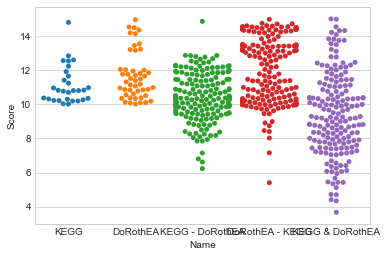

In [349]:
sns.swarmplot(x='Name',y='Score',data=activity)

In [296]:
print(np.median(activity1['Score']),np.std(activity1['Score']))
print(np.median(activity2['Score']),np.std(activity2['Score']))
print(np.median(activity1m2['Score']),np.std(activity1m2['Score']))
print(np.median(activity2m1['Score']),np.std(activity2m1['Score']))
mwu(activity1m2['Score'],activity2m1['Score'])

11.354153763464208 1.3829524044525907
10.802990683483813 1.0946875619165655
nan nan
nan nan


/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:4897: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [178]:
from scipy.stats import mannwhitneyu as mwu

MannwhitneyuResult(statistic=435099.5, pvalue=2.623675320323336e-08)

In [182]:
activity2m1.shape

(1008, 4)